# 01 - Adquisición y Exploración Inicial de Datos  
### Proyecto ML: Análisis Quejas financieras  

## 📂 IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

print("✅ Librerías importadas correctamente")

# Configuración de visualizaciones y pandas:

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", None)

print(f"📆 Fecha ejecución: {datetime.now().strftime('%Y-%m-%d, %H:%M')}")

✅ Librerías importadas correctamente
📆 Fecha ejecución: 2025-08-31, 22:13


## 🔋 CARGA DE DATOS

In [2]:
def load_data(file_path):
    """ 
    Carga el dataset de quejas financieras

    Parameters: 
    ----------
    file_path : str
        Ruta del archivo CSV
    
    Returns: 
    ----------
    pd.DataFrame
        Datafrme con los datos cargados
    """

    try:
        # Intentar cargar el archivo
        df = pd.read_csv(file_path, index_col=0)
        print("✅ Datos cargados correctamente")
        print(f"📊 Dimensiones del Dataset: {df.shape}")
        return df
    except FileNotFoundError: 
        print(f"❌ Error: No se encontró el archivo {file_path}")
        print("💡 Asegúrate de que el archivo esté en la ruta correcta")
        return None
    except Exception as e:
        print(f"❌ Error al cargar los datos: {str(e)}")
        return None 
    
df = load_data("../data/quejas-clientes.csv")

✅ Datos cargados correctamente
📊 Dimensiones del Dataset: (28156, 13)


##  🔍 EXPLORACIÓN INICIAL DE LA ESTRUCTURA

In [3]:
def explore_data_structure(df):
    """ 
    Explora la estructura básica del dataset

    Parameters:
    -----------
    df: pd.DataFrame
        DataFrame a explorar
    """

    print("\n" + "="*80)
    print("📋 EXPLORACIÓN DE LA ESTRUCTURA DE DATOS")
    print("="*80)

    # Información básica
    print(f"\n📊 DIMENSIONES:")
    print(f"   · Filas: {df.shape[0]:,}")
    print(f"   · Columnas: {df.shape[1]:,}")

    # Tipos de datos
    print(f"\n💿 TIPOS DE DATOS:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   · {dtype}: {count} columnas")

    # Información detallada por columna
    print(f"\n📝 INFORMACIÓN POR COLUMNA:")
    info_data = []
    for col in df.columns:
        info_data.append({
            "Columna": col,
            "Tipo": str(df[col].dtype),
            "No nulos": df[col].count(),
            "% Nulos": round((df[col].isnull().sum() / len(df)) * 100, 2),
            "Valores únicos": df[col].nunique()
        })

    info_df = pd.DataFrame(info_data)
    print(info_df.to_string(index=False))

    return info_df

info_summary = explore_data_structure(df)


📋 EXPLORACIÓN DE LA ESTRUCTURA DE DATOS

📊 DIMENSIONES:
   · Filas: 28,156
   · Columnas: 13

💿 TIPOS DE DATOS:
   · object: 11 columnas
   · int64: 1 columnas
   · float64: 1 columnas

📝 INFORMACIÓN POR COLUMNA:
             Columna    Tipo  No nulos  % Nulos  Valores únicos
        Complaint ID   int64     28156     0.00           28156
             Product  object     28156     0.00              11
         Sub-product  object     17582    37.56              42
               Issue  object     28154     0.01              89
           Sub-issue  object     13211    53.08              46
               State  object     27735     1.50              59
            ZIP code float64     27876     0.99            9868
       Date received  object     28156     0.00              78
Date sent to company  object     28156     0.00              78
             Company  object     28156     0.00            1534
    Company response  object     28156     0.00               6
    Timely respons

## 💎ANÁLISIS DE CALIDAD DE DATOS

In [4]:
def analyze_data_quality(df):
    """ 
    Analiza la calidad de los datos

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame a analizar
    """

    print("\n" + "="*80)
    print("🔍 ANÁLISIS DE LA CALIDAD DE DATOS")
    print("="*80)

    # Valores faltantes
    ''' 
    El método más básico sería:
    print(df.isnull().sum())
    '''
    print("\n❓ VALORES FALTANTES:") 
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100

    missing_summary = pd.DataFrame({
        "Columna": missing_data.index,
        "Valores Faltantes": missing_data.values,
        "Porcentaje": missing_percentage.values
    }). sort_values("Porcentaje", ascending=False)

    print(missing_summary[missing_summary["Porcentaje"] > 0].to_string(index=False))

    # Duplicados
    duplicates = df.duplicated().sum()
    print(f"\n🔄 REGISTROS DUPLICADOS:")
    print(f"   · Total: {duplicates:,}")
    print(f"   · Porcentaje: {(duplicates/len(df)*100):.2f}%")

    # Valores únicos en columnas categóricas
    print(f"\n💿 CARDINALIDAD DE VARIABLES CATEGÓRICAS:")
    categorical_cols = df.select_dtypes(include=["object"]).columns
    for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"   · {col}: {unique_count:,} valores únicos")

    return missing_summary

quality_summary = analyze_data_quality(df)


🔍 ANÁLISIS DE LA CALIDAD DE DATOS

❓ VALORES FALTANTES:
           Columna  Valores Faltantes  Porcentaje
Consumer disputed?              22150   78.668845
         Sub-issue              14945   53.079273
       Sub-product              10574   37.555050
             State                421    1.495241
          ZIP code                280    0.994459
             Issue                  2    0.007103

🔄 REGISTROS DUPLICADOS:
   · Total: 0
   · Porcentaje: 0.00%

💿 CARDINALIDAD DE VARIABLES CATEGÓRICAS:
   · Product: 11 valores únicos
   · Sub-product: 42 valores únicos
   · Issue: 89 valores únicos
   · Sub-issue: 46 valores únicos
   · State: 59 valores únicos
   · Date received: 78 valores únicos
   · Date sent to company: 78 valores únicos
   · Company: 1,534 valores únicos
   · Company response: 6 valores únicos
   · Timely response?: 2 valores únicos
   · Consumer disputed?: 2 valores únicos


## 🔑 EXPLORACIÓN DE VARIABLES CLAVE

In [5]:
def explore_key_variables(df):
    """
    Explora las variables más importantes del dataset
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame a explorar
    """
    print("\n" + "="*80)
    print("🎯 EXPLORACIÓN DE VARIABLES CLAVE")
    print("="*80)
    
    # Variable objetivo principal: Company response
    if "Company response" in df.columns:
        print("\n🎯 VARIABLE OBJETIVO: Company response")
        response_counts = df["Company response"].value_counts()
        response_pct = df["Company response"].value_counts(normalize=True) * 100
        
        response_summary = pd.DataFrame({
            "Respuesta": response_counts.index,
            "Cantidad": response_counts.values,
            "Porcentaje": response_pct.values.round(2)
        })
        print(response_summary.to_string(index=False))
    
    # Productos más comunes
    if "Product" in df.columns:
        print("\n📦 PRODUCTOS FINANCIEROS:")
        product_counts = df["Product"].value_counts().head(10)
        for product, count in product_counts.items():
            pct = (count / len(df)) * 100
            print(f"   • {product}: {count:,} ({pct:.1f}%)")
    
    # Estados con más quejas
    if "State" in df.columns:
        print("\n🌎 ESTADOS CON MÁS QUEJAS:")
        state_counts = df["State"].value_counts().head(10)
        for state, count in state_counts.items():
            pct = (count / len(df)) * 100
            print(f"   • {state}: {count:,} ({pct:.1f}%)")
    
    # Análisis temporal
    if "Date received" in df.columns:
        print("\n📅 ANÁLISIS TEMPORAL:")
        df_temp = df.copy()
        df_temp["Date received"] = pd.to_datetime(df_temp["Date received"])
        
        date_range = f"{df_temp['Date received'].min().strftime('%Y-%m-%d')} a {df_temp['Date received'].max().strftime('%Y-%m-%d')}"
        print(f"   • Rango de fechas: {date_range}")
        
        # Quejas por año
        df_temp["Year"] = df_temp["Date received"].dt.year
        yearly_counts = df_temp['Year'].value_counts().sort_index()
        print("   • Quejas por año:")
        for year, count in yearly_counts.items():
            print(f"     - {year}: {count:,}")

# Explorar variables clave
explore_key_variables(df)


🎯 EXPLORACIÓN DE VARIABLES CLAVE

🎯 VARIABLE OBJETIVO: Company response
                      Respuesta  Cantidad  Porcentaje
        Closed with explanation     19381       68.83
Closed with non-monetary relief      3593       12.76
                    In progress      2690        9.55
    Closed with monetary relief      1534        5.45
                         Closed       606        2.15
              Untimely response       352        1.25

📦 PRODUCTOS FINANCIEROS:
   • Debt collection: 7,494 (26.6%)
   • Mortgage: 6,612 (23.5%)
   • Credit reporting: 5,717 (20.3%)
   • Credit card: 2,830 (10.1%)
   • Bank account or service: 2,609 (9.3%)
   • Consumer loan: 1,314 (4.7%)
   • Student loan: 785 (2.8%)
   • Payday loan: 348 (1.2%)
   • Money transfers: 232 (0.8%)
   • Prepaid card: 175 (0.6%)

🌎 ESTADOS CON MÁS QUEJAS:
   • CA: 3,859 (13.7%)
   • FL: 2,592 (9.2%)
   • TX: 2,380 (8.5%)
   • NY: 1,846 (6.6%)
   • GA: 1,146 (4.1%)
   • NJ: 1,113 (4.0%)
   • PA: 1,055 (3.7%)
   • IL: 

## 📈 VISUALIZACIONES INICIALES


📊 CREANDO VISUALIZACIONES INICIALES


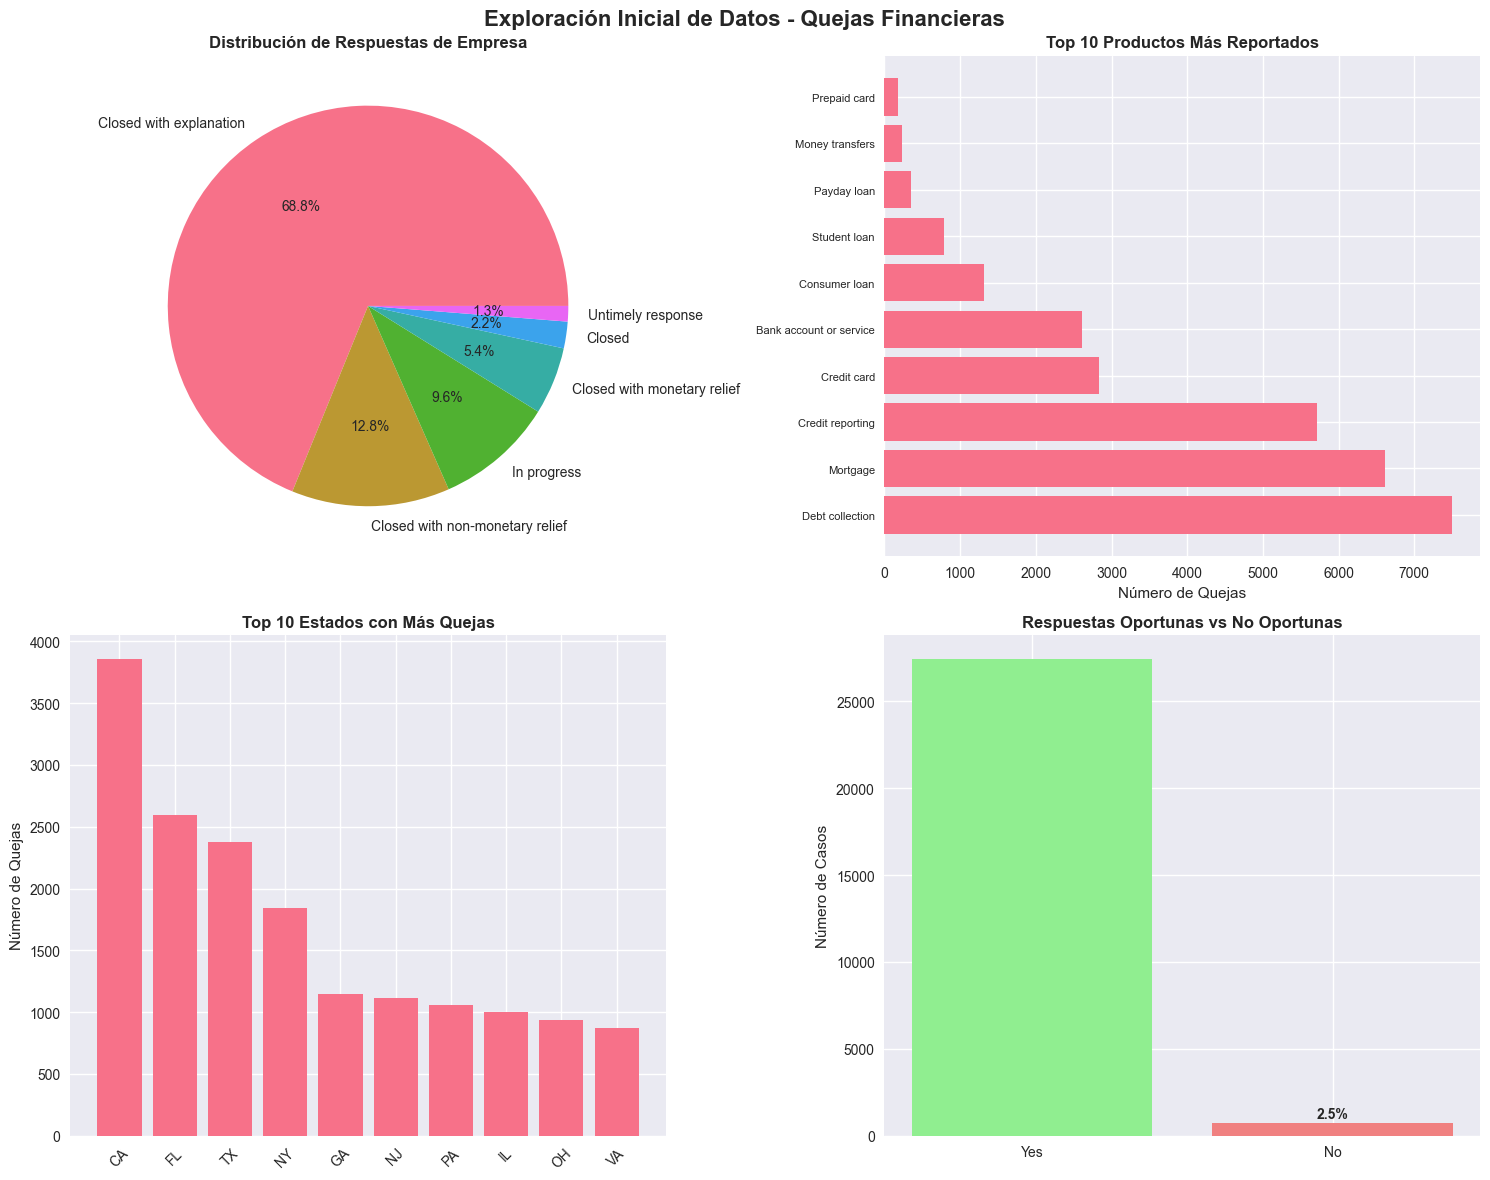

In [6]:
def create_initial_visualizations(df):
    """
    Crea visualizaciones iniciales para entender los datos

    Parameters:
    -----------
    df : pd.DataFrame
    DataFrame a visualizar
    """
    print("\n" + "="*80)
    print("📊 CREANDO VISUALIZACIONES INICIALES")
    print("="*80)
    
    # Configurar subplot
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle("Exploración Inicial de Datos - Quejas Financieras", fontsize=16, fontweight="bold")

    # 1. Distribución de respuestas de empresa
    if "Company response" in df.columns:
        ax1 = axes[0, 0]
        response_counts = df["Company response"].value_counts()
        ax1.pie(response_counts.values, labels=response_counts.index, autopct='%1.1f%%')
        ax1.set_title("Distribución de Respuestas de Empresa", fontweight="bold")

    # 2. Top 10 productos
    if "Product" in df.columns:
        ax2 = axes[0, 1]
        top_products = df["Product"].value_counts().head(10)
        ax2.barh(range(len(top_products)), top_products.values)
        ax2.set_yticks(range(len(top_products)))
        ax2.set_yticklabels(top_products.index, fontsize=8)
        ax2.set_title("Top 10 Productos Más Reportados", fontweight="bold")
        ax2.set_xlabel("Número de Quejas")

    # 3. Estados con más quejas
    if "State" in df.columns:
        ax3 = axes[1, 0]
        top_states = df["State"].value_counts().head(10)
        ax3.bar(range(len(top_states)), top_states.values)
        ax3.set_xticks(range(len(top_states)))
        ax3.set_xticklabels(top_states.index, rotation=45)
        ax3.set_title("Top 10 Estados con Más Quejas", fontweight="bold")
        ax3.set_ylabel("Número de Quejas")

    # 4. Respuesta oportuna
    if "Timely response?" in df.columns:
        ax4 = axes[1, 1]
        timely_counts = df["Timely response?"].value_counts()
        colors = ["lightgreen" if x == "Yes" else "lightcoral" for x in timely_counts.index]
        ax4.bar(timely_counts.index, timely_counts.values, color=colors)
        ax4.set_title("Respuestas Oportunas vs No Oportunas", fontweight="bold")
        ax4.set_ylabel("Número de Casos")

    # Añadir porcentajes
    total = timely_counts.sum()
    for i, (idx, val) in enumerate(timely_counts.items()):
        pct = (val / total) * 100
    ax4.text(i, val + total*0.01, f'{pct:.1f}%', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Crear visualizaciones
create_initial_visualizations(df)

## 📘 RESUMEN EJECUTIVO

In [7]:
def generate_executive_summary(df):
    """
    Genera un resumen ejecutivo de los hallazgos iniciales

    Parameters:
    -----------
    df : pd.DataFrame
    DataFrame analizado
    """
    print("\n" + "="*80)
    print("📋 RESUMEN EJECUTIVO - HALLAZGOS INICIALES")
    print("="*80)

    print(f"\n🔢 ESTADÍSTICAS GENERALES:")
    print(f" • Total de quejas analizadas: {len(df):,}")
    print(f" • Período de datos: {df['Date received'].min()} - {df['Date received'].max()}")
    print(f" • Número de empresas únicas: {df['Company'].nunique():,}")
    print(f" • Estados representados: {df['State'].nunique()}")

    print(f"\n🎯 VARIABLE OBJETIVO:")
    if "Company response" in df.columns:
        most_common_response = df["Company response"].mode()[0]
        response_pct = (df["Company response"].value_counts()[most_common_response] / len(df)) * 100
        print(f" • Respuesta más común: '{most_common_response}' ({response_pct:.1f}%)")
        print(f" • Clases disponibles: {df['Company response'].nunique()}")

    print(f"\n🔍 CALIDAD DE DATOS:")
    total_missing = df.isnull().sum().sum()
    missing_pct = (total_missing / (len(df) * len(df.columns))) * 100
    print(f" • Valores faltantes totales: {total_missing:,} ({missing_pct:.2f}%)")
    print(f" • Registros duplicados: {df.duplicated().sum():,}")

    print(f"\n🏆 TOP INSIGHTS:")
    if "Product" in df.columns:
        top_product = df["Product"].mode()[0]
        top_product_pct = (df["Product"].value_counts()[top_product] / len(df)) * 100
        print(f" • Producto con más quejas: {top_product} ({top_product_pct:.1f}%)")

    if "State" in df.columns:
        top_state = df["State"].mode()[0]
        top_state_pct = (df["State"].value_counts()[top_state] / len(df)) * 100
        print(f" • Estado con más quejas: {top_state} ({top_state_pct:.1f}%)")

    if "Timely response?" in df.columns:
        timely_pct = (df["Timely response?"].value_counts().get("Yes", 0) / len(df)) * 100
        print(f" • Respuestas oportunas: {timely_pct:.1f}%")

    print(f"\n❗ DESAFÍOS IDENTIFICADOS:")
    high_missing_cols = quality_summary[quality_summary["Porcentaje"] > 20]["Columna"].tolist()
    if high_missing_cols:
        print(f" • Columnas con >20% valores faltantes: {len(high_missing_cols)}")
        for col in high_missing_cols[:]:
            print(f"    - {col}")

    high_cardinality_cols = []
    for col in df.select_dtypes(include=["object"]).columns:
        if df[col].nunique() > 100:
            high_cardinality_cols.append(col)

    if high_cardinality_cols:
        print(f" • Columnas con alta cardinalidad: {len(high_cardinality_cols)}")
        for col in high_cardinality_cols[:3]:
            print(f"    - {col} ({df[col].nunique():,} valores únicos)")

generate_executive_summary(df)


📋 RESUMEN EJECUTIVO - HALLAZGOS INICIALES

🔢 ESTADÍSTICAS GENERALES:
 • Total de quejas analizadas: 28,156
 • Período de datos: 2015-01-01 - 2015-03-19
 • Número de empresas únicas: 1,534
 • Estados representados: 59

🎯 VARIABLE OBJETIVO:
 • Respuesta más común: 'Closed with explanation' (68.8%)
 • Clases disponibles: 6

🔍 CALIDAD DE DATOS:
 • Valores faltantes totales: 48,372 (13.22%)
 • Registros duplicados: 0

🏆 TOP INSIGHTS:
 • Producto con más quejas: Debt collection (26.6%)
 • Estado con más quejas: CA (13.7%)
 • Respuestas oportunas: 97.5%

❗ DESAFÍOS IDENTIFICADOS:
 • Columnas con >20% valores faltantes: 3
    - Consumer disputed?
    - Sub-issue
    - Sub-product
 • Columnas con alta cardinalidad: 1
    - Company (1,534 valores únicos)


## 💾 GUARDAR RESUMEN DE DATOS

In [8]:
def save_initial_analysis(df, info_summary, quality_summary):
    """
    Guarda los resultados del análisis inicial

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame original
    info_summary : pd.DataFrame
        Resumen de información por columna
    quality_summary : pd.DataFrame
        Resumen de calidad de datos
    """
    # Crear directorio si no existe
    os.makedirs("../data/processed", exist_ok=True)
    os.makedirs("../reports", exist_ok=True)

    # Guardar datasets
    df.to_csv("../data/processed/01_raw_data.csv", index=False)
    info_summary.to_csv("../reports/01_data_info_summary.csv", index=False)
    quality_summary.to_csv("../reports/01_data_quality_summary.csv", index=False)

    print(f"\n💾 ARCHIVOS GUARDADOS")

# Guardar resultados
save_initial_analysis(df, info_summary, quality_summary)


💾 ARCHIVOS GUARDADOS


## ✅ PRÓXIMOS PASOS EN MENTE: 
1. Limpieza profunda de datos faltantes
2. Tratamiento de variables categóricas de alta cardinalidad
3. Feature engineering basado en fechas
4. Análisis de correlaciones y patrones
5. Definición final del problema de ML